In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt                                           
import matplotlib.dates as mdt   
%matplotlib inline


rangeDF = pd.read_csv('bird_ranges_40yavg.csv', header = 6)
speciesDF = pd.read_csv('bird_species.csv', header = 2)
print(type(rangeDF))
rangeDF.head(n=10)

<class 'pandas.core.frame.DataFrame'>


,year,mean distance (miles),lower confidence (miles),upper confidence (miles)
0,1966,0.000000,0.000000,0.000000
1,1967,1.234169,-4.391334,6.859673
2,1968,8.599031,3.225097,13.972964
3,1969,2.295872,-4.008747,8.600492
4,1970,3.007815,-3.183284,9.198914
5,1971,7.178691,0.475962,13.881420
6,1972,1.091223,-6.219162,8.401608
7,1973,-1.259310,-7.148037,4.629417
8,1974,6.643907,-0.901572,14.189386
9,1975,8.424295,0.413918,16.434673


In [2]:
print(type(speciesDF))
speciesDF.head(n=10)

<class 'pandas.core.frame.DataFrame'>


,Species,Scientific_name,Habitat Guild (3 classes),Habitat Guild (5 classes),Feeder use,Mean latitude (40-year ave from regression),Latitudinal distance moved (miles),Lat. direction moved,F-value latitude slope,p-value slope,Mean dist. from coast (40-yr ave. from regression),Change in mean dist. from coast (miles),Shifted inland or to coast,F-value slope dist. to coast,p-value slope dist. to coast,# state or province strata,40-year Median Trend (% change per year),95% LCI Trend,95% UCI Trend,% of hemispheric range in CBC survey area
0,Greater White-fronted Goose,Anser albifrons,wetland/aquatic,wetland/aquatic,rarely/never,32.95,-60.6,S,20.70,<0.0001,237.5,-28.1,to coast,14.48,0.0005,41,10.10,7.8,12.4,46.3
1,Snow Goose,Chen caerulescens,wetland/aquatic,wetland/aquatic,rarely/never,33.14,217.1,N,165.80,<0.0001,280.0,149.2,inland,99.44,<0.0001,51,7.30,5.1,9.5,84.7
2,Ross's Goose,Chen rossii,wetland/aquatic,wetland/aquatic,rarely/never,34.68,-52.3,S,88.85,<0.0001,412.6,48.4,inland,3.06,0.0881,29,15.80,12.7,18.8,75.7
3,Brant,Branta bernicla,coastal,coastal,rarely/never,41.90,193.4,N,105.40,<0.0001,NaN,NaN,NaN,NaN,NaN,18,3.80,0.8,6.6,53.7
4,"""Canada"" Goose (lumped)",NaN,wetland/aquatic,wetland/aquatic,occasionally,41.03,119.9,N,79.24,<0.0001,421.9,281.5,inland,821.83,<0.0001,55,11.00,9.6,12.7,93.8
5,Mute Swan,Cygnus olor,wetland/aquatic,wetland/aquatic,rarely/never,43.52,-122.9,S,111.90,<0.0001,276.1,234.4,inland,1056.23,<0.0001,32,8.80,7.3,10.0,95.2
6,Trumpeter Swan,Cygnus buccinator,wetland/aquatic,wetland/aquatic,rarely/never,52.23,-36.4,S,14.57,0.0005,162.2,28.8,inland,15.87,0.0003,25,12.10,10.1,14.3,90.6
7,Tundra Swan,Cygnus columbianus,wetland/aquatic,wetland/aquatic,rarely/never,41.24,129.1,N,441.63,<0.0001,231.8,1.7,inland,0.02,0.8791,46,-0.41,-5.1,1.7,78.1
8,Wood Duck,Aix sponsa,wetland/aquatic,wetland/aquatic,rarely/never,33.79,37.1,N,39.68,<0.0001,182.4,12.2,inland,22.15,<0.0001,51,3.70,2.6,4.6,81.2
9,Gadwall,Anas strepera,wetland/aquatic,wetland/aquatic,rarely/never,33.91,148.9,N,383.38,<0.0001,272.3,20.0,inland,8.18,0.0069,53,5.10,4.2,6.0,72.1


In [3]:
print(rangeDF.index)
print(rangeDF.loc[2])
rangeDF.index = pd.to_datetime(rangeDF['year'], 
                                      infer_datetime_format=False, 
                                      format='%Y')

RangeIndex(start=0, stop=48, step=1)
year                        1968.000000
mean distance (miles)          8.599031
lower confidence (miles)       3.225097
upper confidence (miles)      13.972964
Name: 2, dtype: float64


In [4]:
rangeDF.head()

,year,mean distance (miles),lower confidence (miles),upper confidence (miles)
year,,,,
1966-01-01,1966,0.000000,0.000000,0.000000
1967-01-01,1967,1.234169,-4.391334,6.859673
1968-01-01,1968,8.599031,3.225097,13.972964
1969-01-01,1969,2.295872,-4.008747,8.600492
1970-01-01,1970,3.007815,-3.183284,9.198914


In [5]:
speciesDF['Mean dist. from coast (40-yr ave. from regression)'].replace('', np.nan, inplace = False)
speciesDF.dropna(subset=['Mean dist. from coast (40-yr ave. from regression)'], inplace = True)
fixed_index_bird_species = speciesDF.reset_index(drop=True)

speciesDF.head()


,Species,Scientific_name,Habitat Guild (3 classes),Habitat Guild (5 classes),Feeder use,Mean latitude (40-year ave from regression),Latitudinal distance moved (miles),Lat. direction moved,F-value latitude slope,p-value slope,Mean dist. from coast (40-yr ave. from regression),Change in mean dist. from coast (miles),Shifted inland or to coast,F-value slope dist. to coast,p-value slope dist. to coast,# state or province strata,40-year Median Trend (% change per year),95% LCI Trend,95% UCI Trend,% of hemispheric range in CBC survey area
0,Greater White-fronted Goose,Anser albifrons,wetland/aquatic,wetland/aquatic,rarely/never,32.95,-60.6,S,20.70,<0.0001,237.5,-28.1,to coast,14.48,0.0005,41,10.1,7.8,12.4,46.3
1,Snow Goose,Chen caerulescens,wetland/aquatic,wetland/aquatic,rarely/never,33.14,217.1,N,165.80,<0.0001,280.0,149.2,inland,99.44,<0.0001,51,7.3,5.1,9.5,84.7
2,Ross's Goose,Chen rossii,wetland/aquatic,wetland/aquatic,rarely/never,34.68,-52.3,S,88.85,<0.0001,412.6,48.4,inland,3.06,0.0881,29,15.8,12.7,18.8,75.7
4,"""Canada"" Goose (lumped)",NaN,wetland/aquatic,wetland/aquatic,occasionally,41.03,119.9,N,79.24,<0.0001,421.9,281.5,inland,821.83,<0.0001,55,11.0,9.6,12.7,93.8
5,Mute Swan,Cygnus olor,wetland/aquatic,wetland/aquatic,rarely/never,43.52,-122.9,S,111.90,<0.0001,276.1,234.4,inland,1056.23,<0.0001,32,8.8,7.3,10.0,95.2


The original dataset looks to be about using bird migration patterns in order to gain valuable information about the state of climate shange and it's increasing rate of importance. The dataset has four columns: year, mean distance (miles), lower confidence (miles), and upper confidence (miles). The lower and upper confidence account for the error range for the mean distance in miles, where the year column simply shows us the passing of time (And most likely the increase in global warming affecting bird migratory behaviors along with the passing of time). The time spans through 48 years, with multiple bird species being studied to note where the center of abundance is. Species and information on them was collected in the other dataset, to see if different speicies were affected in different ways. If the bird center of abundance was going farther up North every year, this could mean the climates are becoming warmer up North, meaning that global warming is constantly becoming a forefront in global issues. 

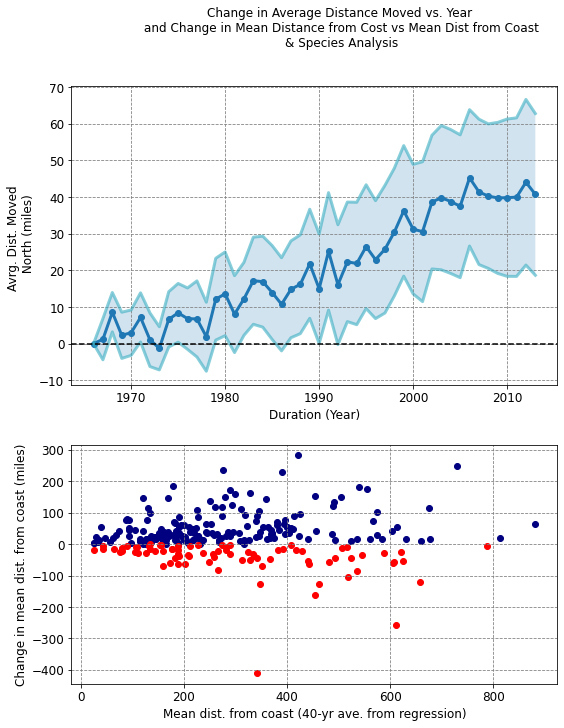

In [6]:
fig = plt.figure(figsize=(10, 11))

fig.suptitle('Change in Average Distance Moved vs. Year \n and Change in Mean Distance from Cost vs Mean Dist from Coast \n' +
             '& Species Analysis', fontsize=12)

#-----------------------------------------CHANGE TWO GRIDSPACE

# Created two grids - one that divides into quarters and one by halfs.
# Notice the different hspace.
gs_upper = plt.GridSpec(2, 1, hspace=0.0, wspace=0.0, right=0.8)
gs_lower = plt.GridSpec(2, 1, hspace=0.5, wspace=0.0, right=0.8)

# Creating ax1 and ax2 for upper plots.
ax1 = fig.add_subplot(gs_upper[0,:])
# Creating ax3 for lower plot.
ax3 = fig.add_subplot(gs_lower[1,:])

#-------------------------------------------

# This is all the same as the above plot again
ax1.plot(rangeDF.index,
         rangeDF['mean distance (miles)'],    
         lw=3,
         marker='o')

ax1.plot(rangeDF.index,
         rangeDF['upper confidence (miles)'], 
         lw=3, 
         alpha=0.6,
         color='#39AEC2')

ax1.plot(rangeDF.index,
        rangeDF['lower confidence (miles)'], 
         lw=3,
         alpha=0.6,
         color='#39AEC2')


ax1.set_xlabel('Duration (Year)', fontsize = 12)
ax1.set_ylabel('Avrg. Dist. Moved \n North (miles)', fontsize=12)

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(rangeDF.index,
                rangeDF['lower confidence (miles)'], 
                 rangeDF['upper confidence (miles)'], 
                 alpha=0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=12)


#IMPORTANT!!!!
# When doing multiplots with hidden axis MAKE SURE to always set the limits of the axis for
# all axis so that the plots don't un-sync - try switching out these datetime objects for other dates
# can be misleading.
#ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])


# Note - if the axis on the upper plot starts to poke out - you can turn this off
# with the following command:
#ax1.set_xticklabels([])


#AND NOW for the third axis

#---------------ADDED

indexN = (speciesDF['Change in mean dist. from coast (miles)'] >= 0)

ax3.scatter(speciesDF.loc[indexN, 'Mean dist. from coast (40-yr ave. from regression)'], 
            speciesDF.loc[indexN, 'Change in mean dist. from coast (miles)'], 
            color='#000080', 
            label='Greater/Equal to 0')

ax3.scatter(speciesDF.loc[~indexN, 'Mean dist. from coast (40-yr ave. from regression)'], 
            speciesDF.loc[~indexN, 'Change in mean dist. from coast (miles)'], 
            color='#FF0000',
            label='Less Than 0')


ax3.set_xlabel('Mean dist. from coast (40-yr ave. from regression)', fontsize=12)
ax3.set_ylabel('Change in mean dist. from coast (miles)', fontsize=12)

ax3.grid(color='gray', linestyle='dashed')
ax3.tick_params(labelsize=12) 
#-----------------

Graphing the relation between the passing of time over a span of a little more than 40 years and the average distance moved to the North in miles helped to see that as time has approached our present, birds have had to travel further and further up North in an almost undulatory manner. The lighter blue shadown behind the dark blue result line represents the potential error in this set of results. Although it may be the case that the average distanve moved north is lower than estimates, it should be noted that the rate of increase in the distance moved is the same either way. This means that regardless of low or high the true results are within the error line, the birds have been affected the same. This quite extreme change in behavior can only be attributed to environmental changes, and should be taken really seriously.

I was wondering whether the mean distance from the coast (which is the 40 year average from the regression) had any positive
or negative relationship with the change in the mean distance that birds are from the coast in miles. After graphing this in the second graph, however, I don't think that there is not a positive or negative relationship with the two. The scatterplot
looks constant throughout, with no major trends that jump out. As the mean distance from the coast increases, you can see that the chanage in mean distance from the coast in miles becomes more varied though. Rather than staying clustered around 0, the points range from 300 to -400. The point at approximately (375, -400) should be noted as an extreme outlier and perhaps should be removed from the graph as well. Overall, the conclusion with this graph seems to be that as the mean distance from the coast increased throughout the 40 year regression period, the change in the mean distance from the coast stayed somewhat consisstent despite natural vairances. These variances could be due to migratory pattern changed due to global warming and other environmental changes.